# Roller Coaster Database

Import Necessry library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

laoding the data 

In [2]:
df = pd.read_csv("/kaggle/input/rollercoaster-database/coaster_db.csv")

In [3]:
df.shape

(1087, 56)

To Know the number of columns and number of rows

In [4]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df.tail()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,...,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


To show the first and last row of the data and show the important column

# Preprocessing the data

In [6]:
df.columns.to_list()

['coaster_name',
 'Length',
 'Speed',
 'Location',
 'Status',
 'Opening date',
 'Type',
 'Manufacturer',
 'Height restriction',
 'Model',
 'Height',
 'Inversions',
 'Lift/launch system',
 'Cost',
 'Trains',
 'Park section',
 'Duration',
 'Capacity',
 'G-force',
 'Designer',
 'Max vertical angle',
 'Drop',
 'Soft opening date',
 'Fast Lane available',
 'Replaced',
 'Track layout',
 'Fastrack available',
 'Soft opening date.1',
 'Closing date',
 'Opened',
 'Replaced by',
 'Website',
 'Flash Pass Available',
 'Must transfer from wheelchair',
 'Theme',
 'Single rider line available',
 'Restraint Style',
 'Flash Pass available',
 'Acceleration',
 'Restraints',
 'Name',
 'year_introduced',
 'latitude',
 'longitude',
 'Type_Main',
 'opening_date_clean',
 'speed1',
 'speed2',
 'speed1_value',
 'speed1_unit',
 'speed_mph',
 'height_value',
 'height_unit',
 'height_ft',
 'Inversions_clean',
 'Gforce_clean']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

after show info there are missing value and the Column with Wrong data type

In [8]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


The data describe big difference between mean and max then there is outlier

In [9]:
df.isna().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

There is a null Value in data 

In [10]:
df.duplicated().sum()

0

There is no Duplicated data

# Cleaning the Data

In [11]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


Drop The columns that i not used in analysis

In [12]:
newdf = df[['coaster_name', 
    'Location', 'Status', 
    'Manufacturer', 
       'year_introduced', 
    'latitude', 'longitude', 
    'Type_Main',
       'opening_date_clean', 
       'speed_mph', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

In [13]:
newdf.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [14]:
newdf.shape

(1087, 13)

after reomve the column that not important this number of rows and columns

In [15]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Status              874 non-null    object 
 3   Manufacturer        1028 non-null   object 
 4   year_introduced     1087 non-null   int64  
 5   latitude            812 non-null    float64
 6   longitude           812 non-null    float64
 7   Type_Main           1087 non-null   object 
 8   opening_date_clean  837 non-null    object 
 9   speed_mph           937 non-null    float64
 10  height_ft           171 non-null    float64
 11  Inversions_clean    1087 non-null   int64  
 12  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


Show the missing value and data type for column after make filter

In [16]:
newdf['opening_date_clean'] = pd.to_datetime(newdf['opening_date_clean'])

/tmp/ipykernel_18/2233310911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['opening_date_clean'] = pd.to_datetime(newdf['opening_date_clean'])


Convert the data type for column opening_date_clean to became datetime

In [17]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   Type_Main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  Inversions_clean    1087 non-null   int64         
 12  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [18]:
newdf.rename(columns={
    'coaster_name' : 'Coaster_Name', 
       'year_introduced':'Year_Introduced', 
       'opening_date_clean':'Opening_Date', 
       'speed_mph' : 'Speed_MPH', 
    'height_ft':'Height_FT',
       'Inversions_clean':'Inversions',
    'Gforce_clean':'Gforce'
},inplace=True)

/tmp/ipykernel_18/3251852175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.rename(columns={


Now Rename the columns to become correct form

In [19]:
newdf.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [20]:
df1 = newdf.loc[~newdf.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop = True)

In [21]:
df1.shape

(990, 13)

# Visualization the Data

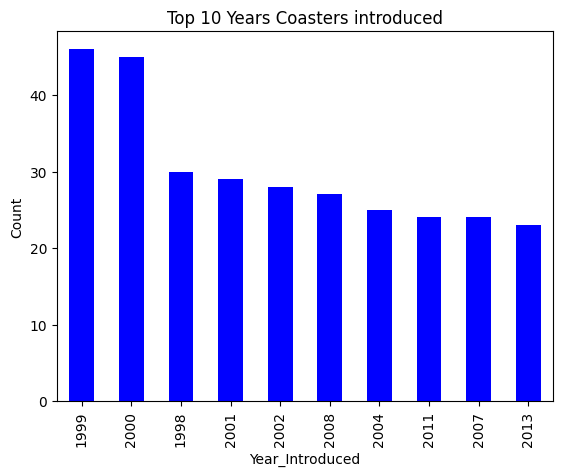

In [22]:
df1['Year_Introduced'].value_counts().head(10).plot(kind='bar', color='blue', title='Top 10 Years Coasters introduced')
plt.xlabel('Year_Introduced')
plt.ylabel('Count')
plt.show()

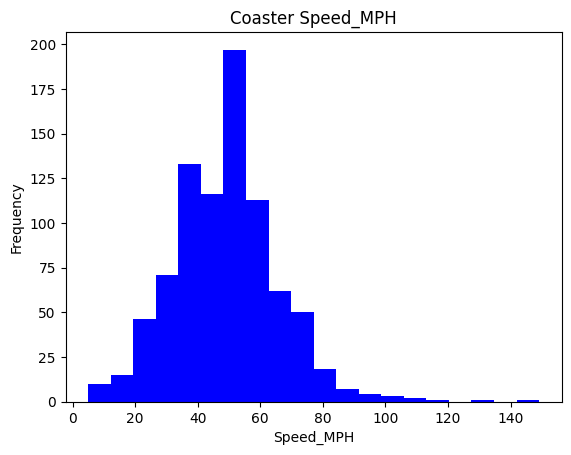

In [23]:
df1['Speed_MPH'].plot(kind='hist', color='blue', title='Coaster Speed_MPH',bins=20)
plt.xlabel('Speed_MPH')
plt.ylabel('Frequency')
plt.show()

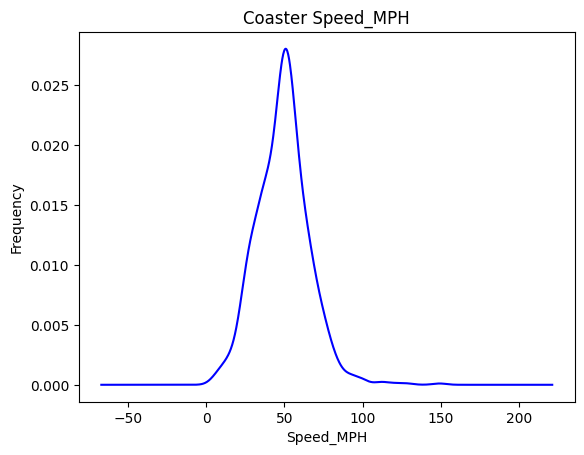

In [24]:
df1['Speed_MPH'].plot(kind='kde', color='blue', title='Coaster Speed_MPH')
plt.xlabel('Speed_MPH')
plt.ylabel('Frequency')
plt.show()

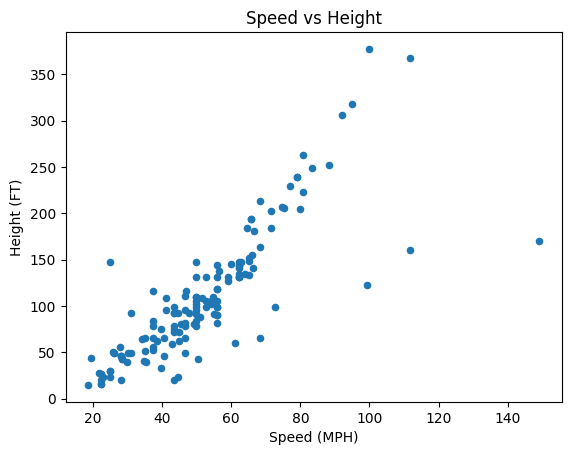

In [25]:
df1.plot(kind='scatter', x='Speed_MPH', y='Height_FT')
plt.xlabel('Speed (MPH)')
plt.ylabel('Height (FT)')
plt.title('Speed vs Height')
plt.show()

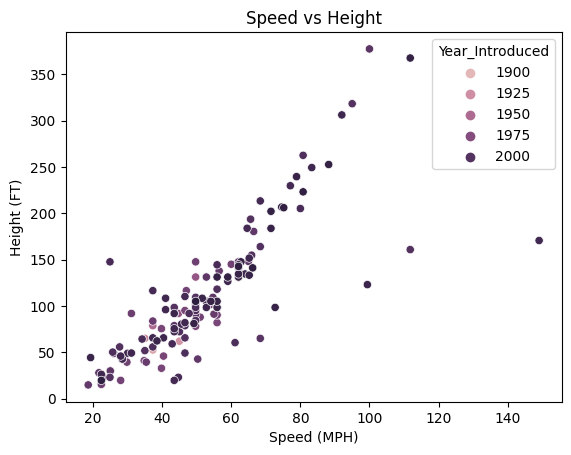

In [26]:
sns.scatterplot(x='Speed_MPH', y='Height_FT',data=df1,hue='Year_Introduced')
plt.xlabel('Speed (MPH)')
plt.ylabel('Height (FT)')
plt.title('Speed vs Height')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

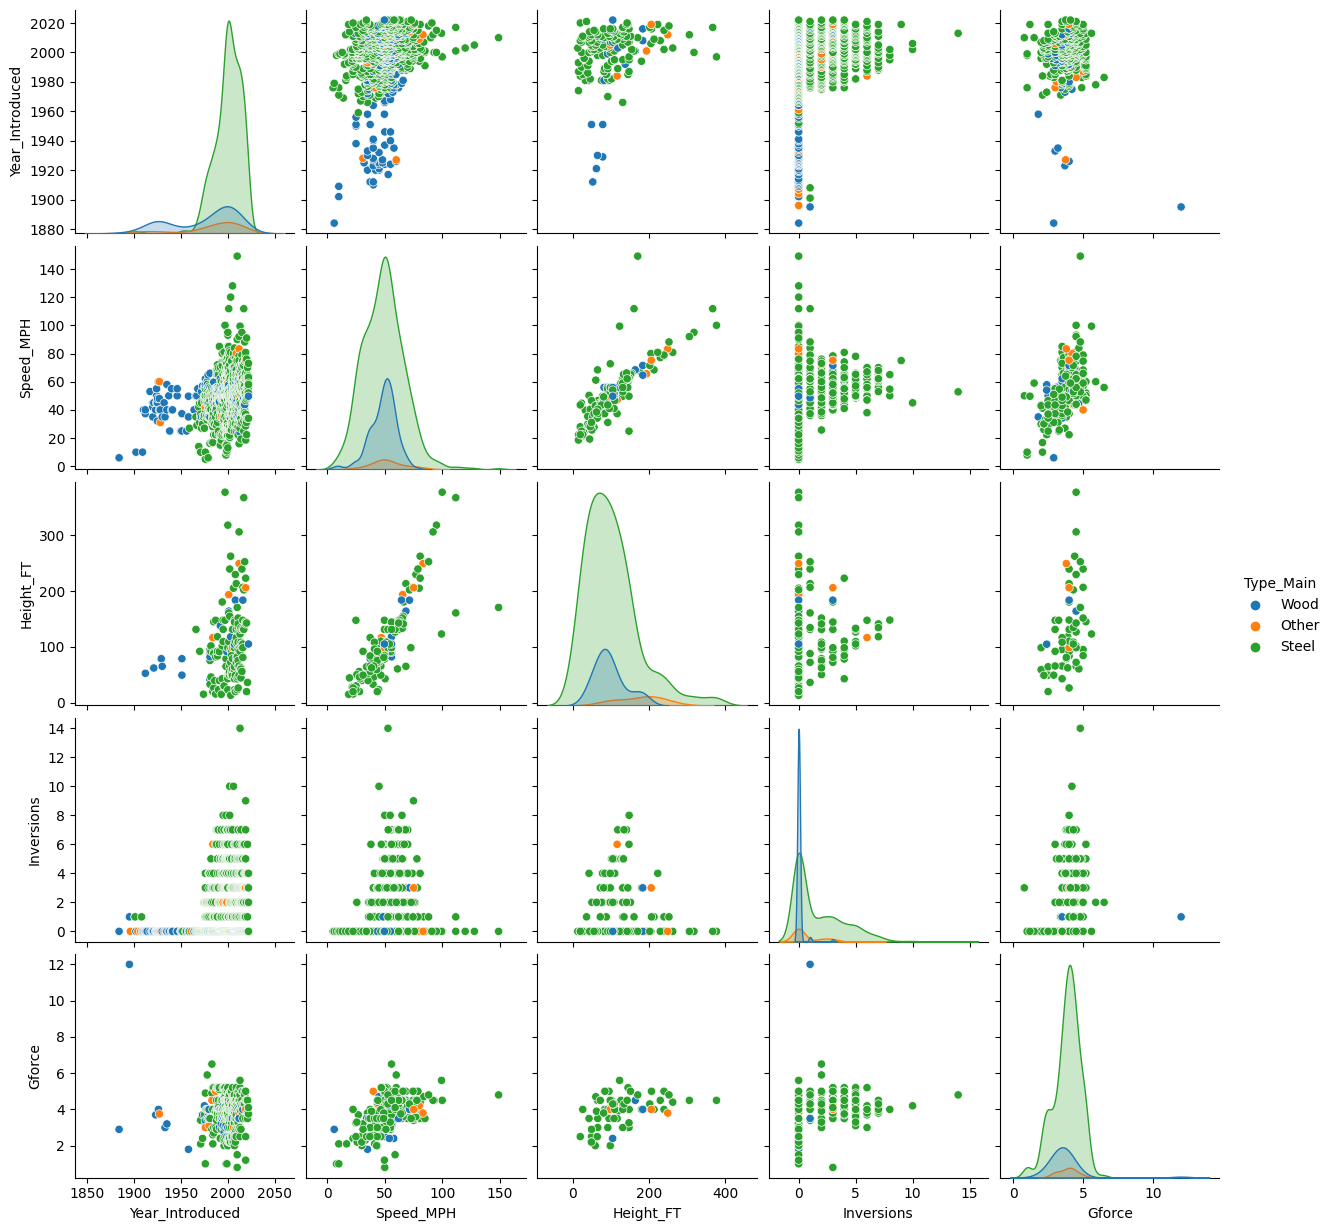

In [27]:
sns.pairplot(data=df1,vars=['Year_Introduced','Speed_MPH','Height_FT','Inversions','Gforce'],hue='Type_Main')
plt.show()

In [28]:
df1[['Year_Introduced','Speed_MPH',
'Height_FT','Inversions','Gforce']].dropna().corr()

,Year_Introduced,Speed_MPH,Height_FT,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_MPH,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_FT,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


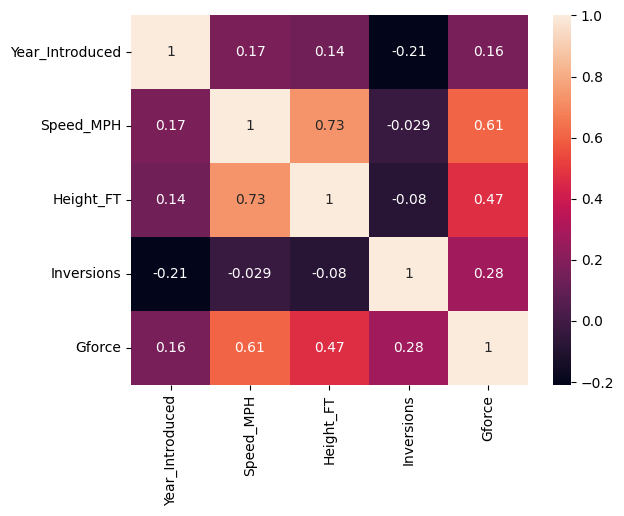

In [29]:
sns.heatmap(df1[['Year_Introduced','Speed_MPH',
'Height_FT','Inversions','Gforce']].dropna().corr(),annot=True)
plt.show()